<a href="https://colab.research.google.com/github/Devaki01/ACM-Responsible-AI/blob/main/Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import networkx as nx

edges = [(1, 2), (2, 3), (3, 4), (2, 4), (4, 5)]

G = nx.Graph()
G.add_edges_from(edges)

print(f"Nodes: {G.nodes()}")
print(f"Edges: {G.edges()}")


Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2), (2, 3), (2, 4), (3, 4), (4, 5)]


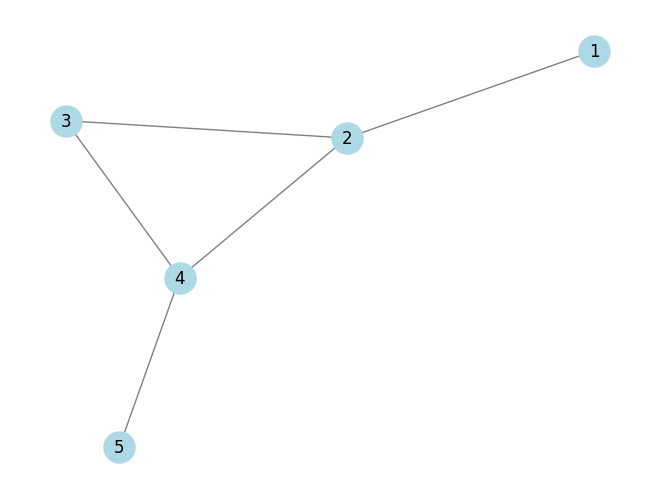

In [9]:
import matplotlib.pyplot as plt

pos = nx.kamada_kawai_layout(G)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color='lightblue',
    font_size=12,
    edge_color='gray'
)

plt.axis('off')
plt.show()

In [10]:
nx.degree_centrality(G)

{1: 0.25, 2: 0.75, 3: 0.5, 4: 0.75, 5: 0.25}

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.1 MB/s eta 0:00:00


In [14]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()

print("Number of graphs:", len(dataset))
print("Number of classes:", dataset.num_classes)
print("Number of node features:", dataset.num_node_features)

Number of graphs: 1
Number of classes: 4
Number of node features: 34


In [15]:
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [17]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

G = to_networkx(data, to_undirected=True)

In [18]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [19]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

In [20]:
train_nodes = data.train_mask.nonzero(as_tuple=True)[0]
print(train_nodes)

tensor([ 0,  4,  8, 24])


In [21]:
import torch

data.train_mask = torch.ones(data.num_nodes, dtype=torch.bool)
data.train_mask

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True])

In [24]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(34, 16)
        self.conv2 = GCNConv(16, 4)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

model = GCN()
print(model)


GCN(
  (conv1): GCNConv(34, 16)
  (conv2): GCNConv(16, 4)
)
